# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `7` | `Questions`

> Hi, Team. 👋

> The exercise questions ask you to solve three bigger questions. As with our previous exercise problem sets, while answering the questions you will be able to incorporate what you learned in class and consolidate your understanding.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [3]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

In [25]:
# Loading Algorithm
from sklearn.linear_model import LinearRegression
# Regularization
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# ENSEMBLE
## Bagging
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import ExtraTreesRegressor
## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Support Vector Machine
from sklearn.svm import SVR # K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor
# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor
# for data split
from sklearn.model_selection import train_test_split
# for cross-validation
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# for assessment
from sklearn.metrics import mean_squared_error
# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

In [26]:
import statsmodels.tsa.arima.model as stats 
import statsmodels.api as sm

In [27]:
from pandas.plotting import scatter_matrix 

# for Pre-processing (Feature Engineering)
from sklearn.preprocessing import StandardScaler
# assumption checks for Time-Series
from statsmodels.graphics.tsaplots import plot_acf

## 👇 <font color = "purple"> Bigger Question 1. 

> Here's something that's familiar to you, with a few minor tweaks.

### Please create a predictive model for the weekly return of AMZN stock. You will use supervised learning for your predictive modelling.

> As you learned in class, to do this it is essential to know what factors are related to Amazon’s stock price, and to incorporate as much information as you can into the model.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as features here.

    Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of Amazon (AMZN). The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
* <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
<br>    
    
> For `input features` (`predictors`; `Xs`), we use (The variables used as predictors are as follows) ...

> `Correlated assets`

* lagged five-day returns of stocks (AAPL, MSFT, F);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of AMZN.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages.

    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this exercise, hyperparameter tuning won’t be requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

> The metric for assessing model performance will be mean squared error (`MSE`).
<br>

> Show which of the algorithms perform relatively better by a comparison visualization of performance, for both the training and testing sets learned in class. 

    Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

### Below are the lines of code that lead to an answer:

In [4]:
stock_ticker = ['AMZN', 'AAPL', 'MSFT', 'F']
currency_ticker = ['DEXJPUS', 'DEXUSUK']
index_ticker = ["SP500", "DJIA", "VIXCLS"]

stock_data = yf.download(stock_ticker)
currency_data = pdr.get_data_fred(currency_ticker)
index_data = pdr.get_data_fred(index_ticker)

[*********************100%***********************]  4 of 4 completed


> ## step 1
> #### outcome Y(每周收益率,也是我们想要预测的值)

In [5]:
Y =\
    (np
    .log(stock_data.loc[ : , ("Adj Close", "AMZN")] )
    .diff(5)
    .shift(-5) )

# Y

In [6]:
Y.name =\
    (Y
     .name[-1]
     +
     "_pred")

# Y

> #### input X(通过构建输入特征（X）和目标变量（Y）来预测每只股票的每周收益率)
> #### X1：AMZN之外的其他股票（AAPL, MSFT, F）的滞后收益率：

In [7]:
X1 =\
    (np.
    log(stock_data.loc[ : , ("Adj Close", ('AAPL', 'MSFT', 'F')
                            )
                      ]
       )
     .diff(5)
    )

X1.columns =\
    (X1
     .columns
     .droplevel()
    )

# X1

> #### X2:外汇对（例如 USD/JPY 和 GBP/USD）的滞后收益率：

In [8]:
X2 =\
    (np
    .log(currency_data)
    .diff(5)
    )

# X2

> #### X3:股市指数（例如 S&P 500、VIX、道琼斯指数）的滞后收益率：
"SP500", "DJIA", "VIXCLS"

In [9]:
X3 =\
    (np
    .log(index_data)
    .diff(5)
    )

# X3

> #### X4：AMZN股票的不同时间周期的滞后收益率，包括 5 天、15 天、30 天和 60 天：

In [10]:
X4 =\
    (
    pd
    .concat([np
            .log(stock_data.loc[ : , ("Adj Close", "AMZN")
                               ]
                )
            .diff(i) for i in [5,
                               15,
                               30,
                               60]
            ],
            axis = 1
           )
    .dropna()
)

X4.columns = ["AMZN_5", "AMZN_15", "AMZN_30", "AMZN_60"]
# X4

In [11]:
X1.index = X1.index.tz_localize(None)
X2.index = X2.index.tz_localize(None)
X3.index = X3.index.tz_localize(None)
X4.index = X4.index.tz_localize(None)

X=\
(
    pd
    .concat([X1, X2, X3, X4],
            axis = 1)
)

# X

In [12]:
Y.index = Y.index.tz_localize(None)
X.index = X.index.tz_localize(None)

In [13]:
data =\
(
    pd
    .concat([Y, X],
            axis = 1)
    .dropna()
    .iloc[ : :5, :]
)
# data

In [14]:
Y = data.loc[ : , Y.name]
# Y

In [15]:
X = data.loc[ : , X.columns]
# X

In [16]:
validation_size = 0.25

train_size =\
    int(len(X)
        *
        (1 - validation_size)
       )

X_train, X_test =\
    (X[0         :train_size],
     X[train_size:len(X)    ]
    )

Y_train, Y_test =\
    (Y[0         :train_size],
     Y[train_size:len(X)    ]
    )

> ## Step 2. moving averages AND exponential moving averages.

In [20]:
MA_21 = stock_data['Adj Close']['AMZN'].rolling(window=21).mean()
MA_63 = stock_data['Adj Close']['AMZN'].rolling(window=63).mean()
MA_252 = stock_data['Adj Close']['AMZN'].rolling(window=252).mean()

EMA_10 = stock_data['Adj Close']['AMZN'].ewm(span=10, adjust=False).mean()
EMA_30 = stock_data['Adj Close']['AMZN'].ewm(span=30, adjust=False).mean()
EMA_200 = stock_data['Adj Close']['AMZN'].ewm(span=200, adjust=False).mean()

X_technical = pd.concat([MA_21, MA_63, MA_252, EMA_10, EMA_30, EMA_200], axis=1)
X_technical.columns = ["MA_21", "MA_63", "MA_252", "EMA_10", "EMA_30", "EMA_200"]

In [22]:
X1.index = X1.index.tz_localize(None)
X2.index = X2.index.tz_localize(None)
X3.index = X3.index.tz_localize(None)
X4.index = X4.index.tz_localize(None)
X_technical.index = X_technical.index.tz_localize(None)

X = pd.concat([X1, X2, X3, X4, X_technical], axis=1).dropna()

> ## step3. model performance

In [32]:
num_folds = 10  # 定义折数
seed = 241001   # 随机种子
scoring = 'neg_mean_squared_error'  # 评估标准

models = []

In [33]:
models.append(("LR", LinearRegression()
              )
             )

models.append(("LASSO", Lasso()
              )
             )

models.append(("EN", ElasticNet()
              )
             )

models.append(("CART", DecisionTreeRegressor()
              )
             )

models.append(("KNN", KNeighborsRegressor()
              )
             )

models.append(("SVR", SVR()
              )
             )

models.append(("RFR", RandomForestRegressor()
              )
             )

models.append(("GBR", GradientBoostingRegressor()
              )
             )

models.append(("ABR", AdaBoostRegressor()
              )
             )

In [34]:
names = []
kfold_results = []
train_results = []
test_results = []

for name, model in models:
    names.append(name)
    
    kfold =\
        (KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        )
    
    cv_results =\
        (
         -1
         *
         cross_val_score(model, X_train, Y_train,
                         cv = kfold,
                         scoring = scoring)
        )
    
    kfold_results.append(cv_results)
    
    res = model.fit(X_train, Y_train)
    
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    
    train_results.append(train_result)
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)

    test_results.append(test_result)
    
    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(),
                                     cv_results.std(),
                                     train_result,
                                     test_result)
    print(message)

LR: 0.002924 (0.000945) 0.002360 0.001696
LASSO: 0.002592 (0.000868) 0.002554 0.001486
EN: 0.002592 (0.000868) 0.002554 0.001486
CART: 0.006305 (0.001534) 0.000000 0.003689
KNN: 0.002966 (0.001303) 0.002042 0.001803
SVR: 0.002968 (0.000865) 0.002472 0.001945
RFR: 0.003075 (0.000970) 0.000440 0.001492
GBR: 0.003808 (0.001244) 0.000230 0.001757
ABR: 0.003062 (0.001028) 0.001299 0.001557


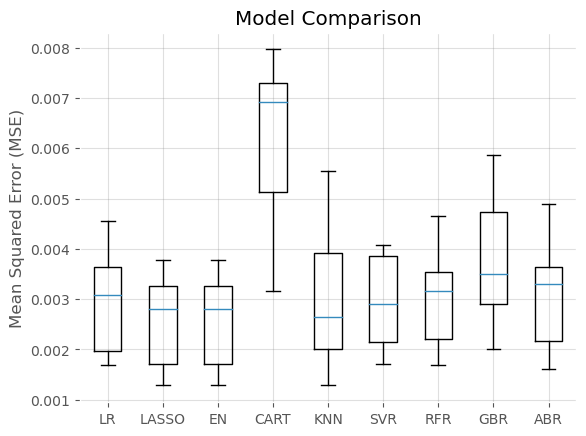

In [35]:
plt.boxplot(kfold_results, labels=names)
plt.title('Model Comparison')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

> ## step 6

In [ ]:
best_model = RandomForestRegressor()
best_model.fit(X_train, Y_train)
Y_pred = best_model.predict(X_test)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(Y_test.values, label="Actual")
plt.plot(Y_pred, label="Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

### <font color = red> Answer 1 is presented in the cell below: </font>

## <font color = blue> 👉 Questions 2 to 5 ask you to build, execute, and backtest a mean-reversion strategy, using `Relative Strength Index` (`RSI`). </font>

#### The Relative Strength Index (RSI) is an indicator that uses the closing prices of an asset to identify oversold and overbought conditions. 

> Most commonly, RSI is calculated using a 14-day period, and measured on a scale from zero to 100. (It is an oscillator.)

> Traders usually buy an asset when it is oversold (when its RSI is below 30) and sell when it is overbought (when its RSI is above 70). 

> More extreme overbought and oversold levels, such as 80 and 20, are used less frequently, and imply stronger momentum.

#### You are asked to build a trading strategy with the following set of rules.

### <font color = green> NOTE: Apple (`AAPL`) as our security of interest. The `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade.

- You can go long and short.
<br>

- To calculate RSI, use 14 periods (trading days).
<br>

- Enter a long position if RSI crosses the lower threshold (standard value of 30), moving upwards. Exit the position when RSI becomes higher than the middle level (value of 50).
<br>

- Enter a short position if RSI crosses the upper threshold (standard value of 70), moving downwards. Exit the position when RSI becomes less than 50.
<br>

- Only one position can be open at a time.

### <font color = green> NOTE: The RSI is defined as follows:
    
### Calculating the RSI first requires the RS which requires an average value of n-many previous trading days. 
<br>
    
- As discussed, a value of 14 days is common for the RSI calculation. 
<br>
    
- The first RS value requires the price from all 14 of the first trading days. Often, this is a source of confusion with the RSI given successive values only require the most recent. 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value to calculate the next average value 
    by multiplying by our lookback period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 2 is presented in the cell below: </font>

### <font color = blue> 👉 Question 3</font>. How much in cumulative returns could you have had as a result of the RSI strategy?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 3 </font>

    The answer is ____________ % .

### <font color = blue> 👉 Question 4</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 4 </font>

    The Worst drawdown period     : Net drawdown ____________ % | Duration ____________ Days
    
    The 2nd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
     
    The 3rd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
         
    The 4th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
    
    The 5th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days

### <font color = blue> 👉 Question 5</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 5 </font>

    Below average year(s) : ____________ 
    
    Above average year(s) : ____________ 
     

###  <font color = blue> 👉 Question 6. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 6 </font>
    
    Sharpe ratio: __________
    

## 👇 <font color = "purple"> Bigger Question 7. ### 

### This bigger question is where you will execute a principal component analysis (PCA) based portfolio for asset allocation. 
<br>
    
### Go to [the list of SP 500 companies on Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).
    
    Step 1: Among the securities added to the S&P 500 component before January 2000, select the first 30 stocks. 
    
    Step 2: Your objective is to find the portfolio using PCA. Using what you learned in class, 
    identify the profile of each portfolio. 
    
    Step 3: Then backtest the performance of your portfolio, relative to the equal weight portfolio. 
    Here, as you learned in class, use 80% of your data for PCA and 20% for backtesting.
    
### <font color = "green"> NOTE: The investment horizon will be 20 years between 2000 and 2019    

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 7 is presented in the cell below: </font>

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊